In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/mmsegmentation.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/mmsegmentation")

In [ ]:
!pip install -r./mmsegmentation/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
ERROR: pip's dependency resolver does not c

In [ ]:
from mmseg.apis import inference_model, init_model, show_result_pyplot

model = init_model('/content/mmsegmentation/work_dirs/segformer_fp_mit_b0/segformer_fp_mit_b0.py','/content/mmsegmentation/work_dirs/segformer_fp_mit_b0/iter_160000.pth', device='cpu')
result = inference_model(model, '/content/000004.jpg')

/usr/local/lib/python3.10/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.10/dist-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/mmsegmentation/work_dirs/segformer_fp_mit_b0/iter_160000.pth


FileNotFoundError: [Errno 2] No such file or directory: '/content/000004.jpg'

In [ ]:
model.dataset_meta['classes']

('background',
 'person',
 'skin',
 'left brow',
 'right brow',
 'left eye',
 'right eye',
 'lips',
 'teeth')

In [ ]:
model.dataset_meta['palette']

[[0, 0, 0],
 [223, 87, 188],
 [160, 221, 255],
 [130, 106, 237],
 [200, 121, 255],
 [255, 183, 255],
 [0, 144, 193],
 [113, 137, 255],
 [230, 232, 230]]

In [ ]:
print(palette[1])

[0.8745098  0.34117647 0.7372549 ]


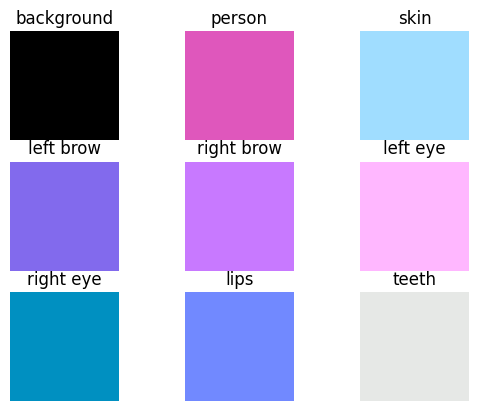

In [ ]:
import numpy as np
from skimage import io
palette = np.array([[0, 0, 0],
 [223, 87, 188],
 [160, 221, 255],
 [130, 106, 237],
 [200, 121, 255],
 [255, 183, 255],
 [0, 144, 193],
 [113, 137, 255],
 [230, 232, 230]], dtype=np.uint8)

import matplotlib.pyplot as plt
import numpy as np

def display_rgb(rgb_tuple, titles):

    fig, axes = plt.subplots(nrows=3, ncols=3)
    count=0
    for row in axes:
      for col in row:
        img = np.array([[rgb_tuple[count]]])
        col.title.set_text(titles[count])
        col.imshow(img)
        col.axis('off')
        count+=1
palette = palette/255
# Define an RGB color as a tuple (R, G, B) where each value is between 0 and 1
rgb_color = palette[0]
classes=model.dataset_meta['classes']
display_rgb(palette, classes)

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


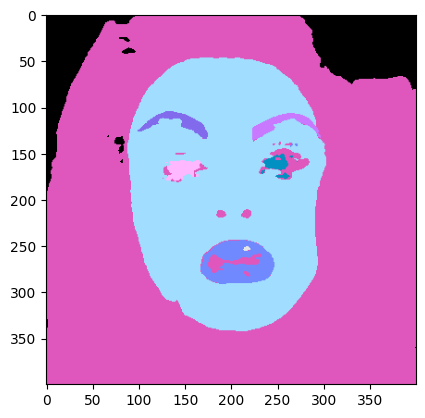

In [ ]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

# show the results
vis_result = show_result_pyplot(model, '/content/000004.jpg', result, show=False, opacity=1.0, with_labels=False)
plt.imshow(vis_result)